In [22]:
# 7. Elabora un modelo predictivo aplicando el algoritmo clasificador
# Bayesiano para resolver un problema de clasificación utilizando
# lenguaje Python


# Con el fin de clasificar las distintas actividades que puede realizar una persona,
# se realizó un experimento a un grupo de 30 voluntarios dentro de un grupo de
# edad de 19 a 48 años. Cada persona realizó seis actividades (CAMINAR,
# CAMINAR POR LAS ESCALERAS, BAJAR LAS ESCALERAS, SENTARSE, DE PIE,
# RECOSTARSE) con un smartphone (Samsung Galaxy S II) conectado en su
# cintura. Usando el acelerómetro y giroscopio integrados en el smartphone, se
# tienen la siguiente data:

# -Aceleración triaxial del acelerómetro (aceleración total) y la aceleración corporal estimada.

# -Velocidad angular triaxial del giroscopio.
# -Variables de dominio de tiempo y frecuencia.
# -Su etiqueta de actividad.
# -Un identificador del sujeto que realizó el experimento.
# El conjunto de datos obtenido se ha dividido aleatoriamente en dos conjuntos
# (train y test), donde se seleccionó al 70% de los voluntarios para generar los
# datos de entrenamiento y al 30% los datos de la prueba.




In [30]:
# 1. Cargue los set de datos de entrenamiento y prueba. ¿Cuáles son las dimensiones de estos set de datos?

import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd


# Cargamos los datos
train = pd.read_csv('https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/train.csv')
print(train.head())

# ¿Cuáles son las dimensiones de estos set de datos?

print(train.shape)



   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X   
0           0.288585          -0.020294          -0.132905         -0.995279  \
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y   
0         -0.983111         -0.913526         -0.995112         -0.983185  \
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

In [24]:
test = pd.read_csv('https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/test.csv')
test.head()

test.shape



(2947, 563)

col_0               count
Activity                 
LAYING               1407
SITTING              1286
STANDING             1374
WALKING              1226
WALKING_DOWNSTAIRS    986


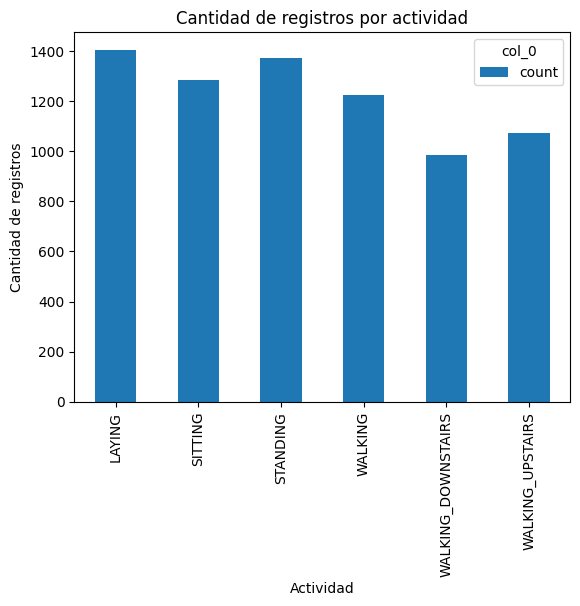

In [50]:
# 2. Estudie la cantidad de registros que hay en cada actividad en el set de
# entrenamiento. Para esto, una opción es utilizar la función de pandas
# crosstab(index=columna, columns="count"). ¿Cómo se encuentran
# repartidas las Actividades? ¿Existe algún desbalance en las categorías?
# (realice un gráfico que acompañe su análisis) Comente.


X = pd.crosstab(index=train["Activity"], columns="count")
X = X.rename(columns={'col_0': col_0})
print(X.head())


X.plot.bar()

plt.ylabel('Cantidad de registros')
plt.xlabel('Actividad')
plt.title('Cantidad de registros por actividad')
plt.show()

# 




In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos en un DataFrame (supongamos que la columna objetivo se llama 'clase')
df=X

# Calcular la distribución de clases
distribucion_clases = df['col_0'].value_counts()

# Visualizar la distribución de clases en un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(x='col_0', data=df)
plt.title('Distribución de clases')
plt.show()

# Calcular las proporciones de clases
proporciones_clases = df['col_0'].value_counts(normalize=True)

# Imprimir las proporciones de clases
print(proporciones_clases)

# Calcular la matriz de confusión (suponiendo que tienes predicciones en la columna 'predicciones')
matriz_confusion = pd.crosstab(df['col_0'], df['count'])

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, cmap='Blues')
plt.title('Matriz de confusión')
plt.show()

# Calcular las métricas de evaluación (suponiendo que tienes las clases verdaderas en 'clase' y las predicciones en 'predicciones')
from sklearn.metrics import classification_report

reporte = classification_report(df['col_0'], df['count'])
print(reporte)

KeyError: 'col_0'

In [69]:
# 3. Defina X_train y X_test como corresponda (omitiendo las variables que no corresponden a variables predictoras).

train_clean = train.drop(['subject', 'Activity'], axis=1)
test_clean = test.drop(['subject', 'Activity'], axis=1)



# X_train, X_test, y_train, y_test = train_test_split(train_clean, test_clean, test_size=0.3, random_state=42)

x_train, x_test, y_train, y_test = train_test_split (iris_df.drop('target'), test_size=0.3, random_state=42)



ValueError: Found input variables with inconsistent numbers of samples: [7352, 2947]

In [72]:
from sklearn.datasets import load_iris

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [73]:
X, y = iris_df.drop('target', axis=1), iris_df['target']

In [76]:
# print(X.head())
print(y.head())


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32


In [68]:
# 4. Estandarice el set de features de entrenamiento y prueba. Puede utilizar 
# la función StandardScaler:

from sklearn.preprocessing import StandardScaler

x_stand_train = StandardScaler().fit_transform(X_train)
x_stand_test = StandardScaler().fit_transform(X_test)



In [ ]:
# 5. Defina y_train e y_test como corresponda (recuerde que debe estar
# codificada numéricamente). Para recodificar un vector o columna y de
# varias categorías a formato numérico puede utilizar:

from sklearn import preprocessing

y_train = train['Activity']
y_test = test['Activity']
encoder=preprocessing.LabelEncoder().fit(y_train)
y_new=encodertrain.transform(y_train)



from sklearn.preprocessing import LabelEncoder



le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

